In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Set GPU memory growth configuration before importing TensorFlow
physical_gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in physical_gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Data directories and parameters
train_data_dir = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/train_dir'
validation_data_dir = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/val_dir'
img_width, img_height = 224, 224
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom top layers for skin cancer classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
epochs = 20
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)


Found 32786 images belonging to 7 classes.
Found 938 images belonging to 7 classes.
Epoch 1/20
1024/1024 [==============================] - 279s 260ms/step - loss: 1.6269 - accuracy: 0.3747 - val_loss: 1.0187 - val_accuracy: 0.7425
Epoch 2/20
1024/1024 [==============================] - 261s 255ms/step - loss: 1.3896 - accuracy: 0.4744 - val_loss: 0.8017 - val_accuracy: 0.7716
Epoch 3/20
1024/1024 [==============================] - 261s 255ms/step - loss: 1.2963 - accuracy: 0.5103 - val_loss: 0.8165 - val_accuracy: 0.7414
Epoch 4/20
1024/1024 [==============================] - 261s 255ms/step - loss: 1.2416 - accuracy: 0.5281 - val_loss: 0.6581 - val_accuracy: 0.7953
Epoch 5/20
1024/1024 [==============================] - 261s 255ms/step - loss: 1.2017 - accuracy: 0.5419 - val_loss: 0.7810 - val_accuracy: 0.7425
Epoch 6/20
1024/1024 [==============================] - 261s 255ms/step - loss: 1.1750 - accuracy: 0.5488 - val_loss: 0.6276 - val_accuracy: 0.8039
Epoch 7/20
1024/1024 [======

In [3]:
# Save the model
model.save('VGG16accuracy61_skin_cancer_model_2.h5')

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler

# Set GPU memory growth configuration before importing TensorFlow
physical_gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in physical_gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Data directories and parameters
train_data_dir = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/train_dir'
validation_data_dir = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/val_dir'
img_width, img_height = 224, 224
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,         # Random rotation
    width_shift_range=0.2,     # Random horizontal shift
    height_shift_range=0.2,    # Random vertical shift
    horizontal_flip=True,      # Random horizontal flip
    zoom_range=0.2             # Random zoom
)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom top layers for skin cancer classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Add Dropout layer to reduce overfitting
predictions = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Learning rate scheduler to reduce learning rate over epochs
def lr_scheduler(epoch):
    initial_lr = 0.001
    drop_rate = 0.5
    epochs_drop = 5
    lr = initial_lr * (drop_rate ** (epoch // epochs_drop))
    return lr

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
epochs = 20
lr_scheduler_callback = LearningRateScheduler(lr_scheduler)
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    callbacks=[lr_scheduler_callback]
)


Found 32786 images belonging to 7 classes.
Found 938 images belonging to 7 classes.
Epoch 1/20
1024/1024 [==============================] - 672s 645ms/step - loss: 1.6495 - accuracy: 0.3514 - val_loss: 1.1862 - val_accuracy: 0.7004 - lr: 0.0010
Epoch 2/20
1024/1024 [==============================] - 492s 480ms/step - loss: 1.4598 - accuracy: 0.4405 - val_loss: 0.8785 - val_accuracy: 0.7640 - lr: 0.0010
Epoch 3/20
1024/1024 [==============================] - 358s 349ms/step - loss: 1.3825 - accuracy: 0.4728 - val_loss: 0.6997 - val_accuracy: 0.7953 - lr: 0.0010
Epoch 4/20
1024/1024 [==============================] - 330s 322ms/step - loss: 1.3382 - accuracy: 0.4885 - val_loss: 0.7439 - val_accuracy: 0.7769 - lr: 0.0010
Epoch 5/20
1024/1024 [==============================] - 330s 322ms/step - loss: 1.3007 - accuracy: 0.5034 - val_loss: 0.6632 - val_accuracy: 0.8006 - lr: 0.0010
Epoch 6/20
1024/1024 [==============================] - 332s 325ms/step - loss: 1.2601 - accuracy: 0.5165 - val

KeyboardInterrupt: 

In [2]:
pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/96/9b/10048be0c335327077af430c5a6637c0b9e7fe9121a8048836f1bb022a81/scipy-1.11.1-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     ------------- ------------------------ 20.5/59.1 kB 330.3 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/59.1 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 59.1/59.1 kB 391.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.1 MB 991.0 kB/s eta 0:00:45
   ---------------------------------------- 0.1/44.1 MB 1.1 MB/s eta 0:00:42
   ---------------------------------------- 0.1/44.1 MB 1.1 MB/s eta 0:00:42
   ---------------------------------------- 0.2/44.1 MB 1.1 MB/s eta 0:00:41
   ---------------------------------------- 0.2/44.1 MB 1.1 MB/s eta 0:00:41
   -------------------------

In [1]:
import scipy

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set GPU memory growth configuration before importing TensorFlow
physical_gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in physical_gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Data directories and parameters
train_data_dir = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/train_dir'
validation_data_dir = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/val_dir'
img_width, img_height = 224, 224
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom top layers for skin cancer classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training
epochs = 20
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)


Found 32786 images belonging to 7 classes.
Found 938 images belonging to 7 classes.
Epoch 1/20
1024/1024 [==============================] - 137s 124ms/step - loss: 1.3222 - accuracy: 0.4981 - val_loss: 0.5597 - val_accuracy: 0.8254
Epoch 2/20
1024/1024 [==============================] - 124s 121ms/step - loss: 1.1159 - accuracy: 0.5751 - val_loss: 0.5328 - val_accuracy: 0.8351
Epoch 3/20
1024/1024 [==============================] - 123s 120ms/step - loss: 1.0464 - accuracy: 0.5979 - val_loss: 0.5596 - val_accuracy: 0.8222
Epoch 4/20
1024/1024 [==============================] - 123s 120ms/step - loss: 1.0205 - accuracy: 0.6085 - val_loss: 0.5083 - val_accuracy: 0.8416
Epoch 5/20
1024/1024 [==============================] - 123s 120ms/step - loss: 0.9816 - accuracy: 0.6221 - val_loss: 0.5265 - val_accuracy: 0.8330
Epoch 6/20
1024/1024 [==============================] - 123s 120ms/step - loss: 0.9488 - accuracy: 0.6347 - val_loss: 0.4861 - val_accuracy: 0.8416
Epoch 7/20
1024/1024 [======

In [3]:
# Save the model
model.save('Inceptionv3accuracy68_skin_cancer_model_2.h5')

In [4]:
# Save the model weights
model.save_weights('Inceptionv3accuracy68_skin_cancer_model_2_weights.h5')


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set GPU memory growth configuration before importing TensorFlow
physical_gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in physical_gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Data directories and parameters
train_data_dir = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/train_dir'
validation_data_dir = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/test_dir'
img_width, img_height = 224, 224
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained InceptionV3 model without the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom top layers for skin cancer classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with a learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training
epochs = 20
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)


Found 32786 images belonging to 7 classes.
Found 5783 images belonging to 7 classes.
Epoch 1/20
1024/1024 [==============================] - 143s 136ms/step - loss: 1.3101 - accuracy: 0.4995 - val_loss: 1.0095 - val_accuracy: 0.6297
Epoch 2/20
1024/1024 [==============================] - 139s 136ms/step - loss: 1.1159 - accuracy: 0.5700 - val_loss: 0.9622 - val_accuracy: 0.6297
Epoch 3/20
1024/1024 [==============================] - 140s 136ms/step - loss: 1.0553 - accuracy: 0.5923 - val_loss: 0.8968 - val_accuracy: 0.6609
Epoch 4/20
1024/1024 [==============================] - 140s 136ms/step - loss: 1.0184 - accuracy: 0.6071 - val_loss: 0.8537 - val_accuracy: 0.6740
Epoch 5/20
1024/1024 [==============================] - 139s 136ms/step - loss: 0.9808 - accuracy: 0.6184 - val_loss: 0.8332 - val_accuracy: 0.6797
Epoch 6/20
1024/1024 [==============================] - 139s 136ms/step - loss: 0.9461 - accuracy: 0.6297 - val_loss: 0.8023 - val_accuracy: 0.6927
Epoch 7/20
1024/1024 [=====

KeyboardInterrupt: 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Set GPU memory growth configuration before importing TensorFlow
physical_gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in physical_gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Data directories and parameters
train_data_dir = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/train_dir'
validation_data_dir = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/val_dir'
img_width, img_height = 224, 224
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Create base InceptionV3 model 
base_model = InceptionV3(input_shape=(224, 224, 3), 
                         include_top=False, weights='imagenet')

# Freeze the base model 
base_model.trainable = False

# Add pooling and new output layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x) 
predictions = Dense(7, activation='softmax')(x)

# Create new model 
model_inception = Model(inputs=base_model.input, outputs=predictions)

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model_inception.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Fit the model
epochs = 60
history = model_inception.fit(
    train_generator,
    epochs=epochs,
    verbose=1,
    steps_per_epoch=train_generator.samples // batch_size,
    callbacks=[learning_rate_reduction, early_stopping],
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)


Found 32786 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


C:\Users\26266\anaconda3\envs\gputensor\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/60
1024/1024 [==============================] - 135s 122ms/step - loss: 1.0420 - accuracy: 0.6077 - val_loss: 0.5354 - val_accuracy: 0.8222 - lr: 0.0010
Epoch 2/60
1024/1024 [==============================] - 121s 119ms/step - loss: 0.8035 - accuracy: 0.6941 - val_loss: 0.4929 - val_accuracy: 0.8244 - lr: 0.0010
Epoch 3/60
1024/1024 [==============================] - 122s 119ms/step - loss: 0.6882 - accuracy: 0.7349 - val_loss: 0.4909 - val_accuracy: 0.8394 - lr: 0.0010
Epoch 4/60
1024/1024 [==============================] - 122s 119ms/step - loss: 0.6091 - accuracy: 0.7666 - val_loss: 0.4757 - val_accuracy: 0.8459 - lr: 0.0010
Epoch 5/60
1024/1024 [==============================] - 122s 119ms/step - loss: 0.5395 - accuracy: 0.7928 - val_loss: 0.4585 - val_accuracy: 0.8470 - lr: 0.0010
Epoch 6/60
1024/1024 [==============================] - 122s 119ms/step - loss: 0.4833 - accuracy: 0.8158 - val_loss: 0.4977 - val_accuracy: 0.8470 - lr: 0.0010
Epoch 7/60
1024/1024 [============

In [2]:
# Save the trained model
model_inception.save("skin_cancer_inception_model_accuracy99.31.h5")

# Optionally, you can also save the model's architecture in JSON format
model_architecture = model_inception.to_json()
with open("skin_cancer_inception_architecture_accuracy99.31.json", "w") as json_file:
    json_file.write(model_architecture)


In [3]:
import numpy as np
from sklearn.metrics import classification_report

# Load your test dataset (similar to how you loaded the training data)
test_data_dir = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/test_dir'
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep the order of images for evaluation
)

# Make predictions using the model
predictions = model_inception.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert predictions and true labels to class indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Generate a classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_names)

print(report)


Found 5783 images belonging to 7 classes.
181/181 [==============================] - 25s 135ms/step
              precision    recall  f1-score   support

       akiec       0.65      0.77      0.71       782
         bcc       0.76      0.69      0.72       878
         bkl       0.66      0.50      0.57       888
          df       0.86      0.89      0.88       661
         mel       0.65      0.66      0.65       888
          nv       0.82      0.91      0.86       893
        vasc       0.93      0.96      0.95       793

    accuracy                           0.76      5783
   macro avg       0.76      0.77      0.76      5783
weighted avg       0.76      0.76      0.76      5783



1/1 [==============================] - 3s 3s/step


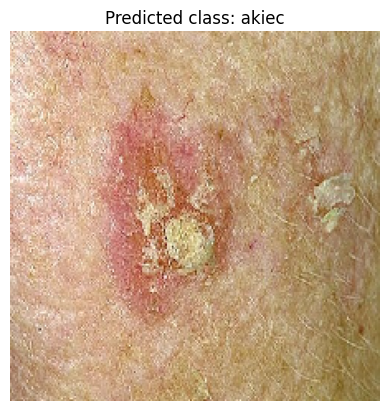

1/1 [==============================] - 0s 26ms/step


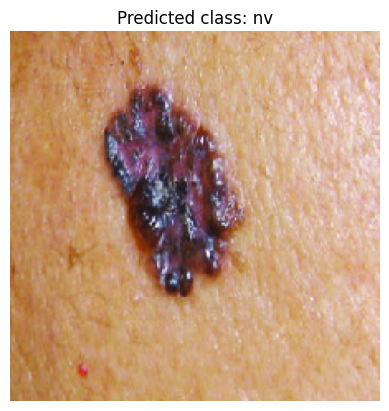

1/1 [==============================] - 0s 25ms/step


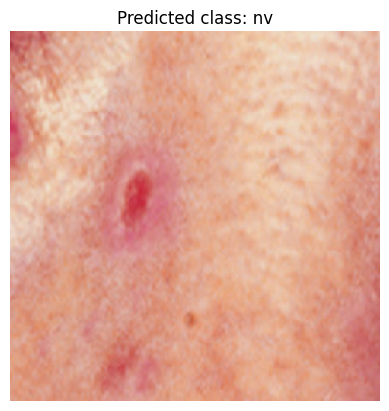

1/1 [==============================] - 0s 25ms/step


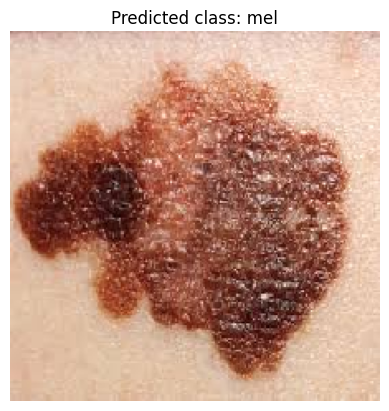

1/1 [==============================] - 0s 36ms/step


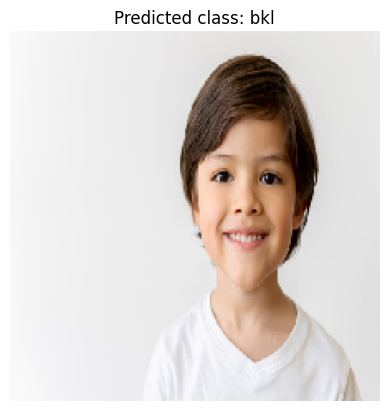

1/1 [==============================] - 0s 31ms/step


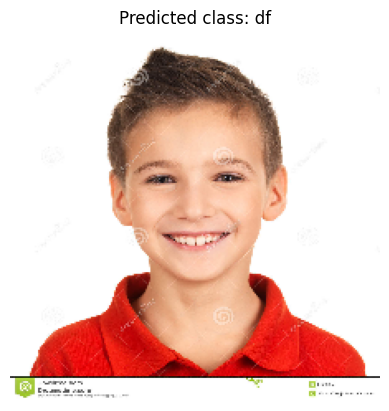

1/1 [==============================] - 0s 31ms/step


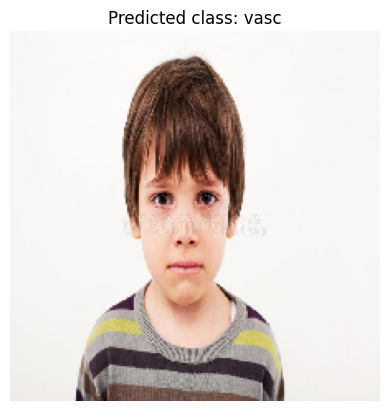

1/1 [==============================] - 0s 35ms/step


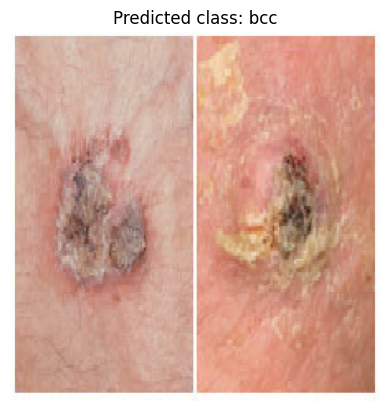

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the trained model
model = model_inception  # Replace with your model

# Define class labels
class_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

# Path to the directory containing test images
test_images_directory = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/test_images_directory'

# Loop through test images and make predictions
for filename in os.listdir(test_images_directory):
    if filename.endswith('.jpg'):  # Assuming the images are in JPG format
        image_path = os.path.join(test_images_directory, filename)
        
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
        
        # Make predictions
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions[0])
        predicted_class_label = class_labels[predicted_class_index]
        
        # Visualize the result
        plt.imshow(img)
        plt.title(f'Predicted class: {predicted_class_label}')
        plt.axis('off')
        plt.show()


In [5]:
# Convert the Keras model to a TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model_inception)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("skin_cancer_inception_model_accuracy99.31or76.tflite", "wb") as tflite_file:
    tflite_file.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\26266\AppData\Local\Temp\tmpxmzih7a_\assets


INFO:tensorflow:Assets written to: C:\Users\26266\AppData\Local\Temp\tmpxmzih7a_\assets


In [6]:
# Convert the Keras model to a quantization-aware TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model_inception)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the quantized TFLite model to a file
with open("skin_cancer_inception_model_quantized_accuracy99.31or76.tflite", "wb") as tflite_file:
    tflite_file.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\26266\AppData\Local\Temp\tmpp4rd5sxo\assets


INFO:tensorflow:Assets written to: C:\Users\26266\AppData\Local\Temp\tmpp4rd5sxo\assets


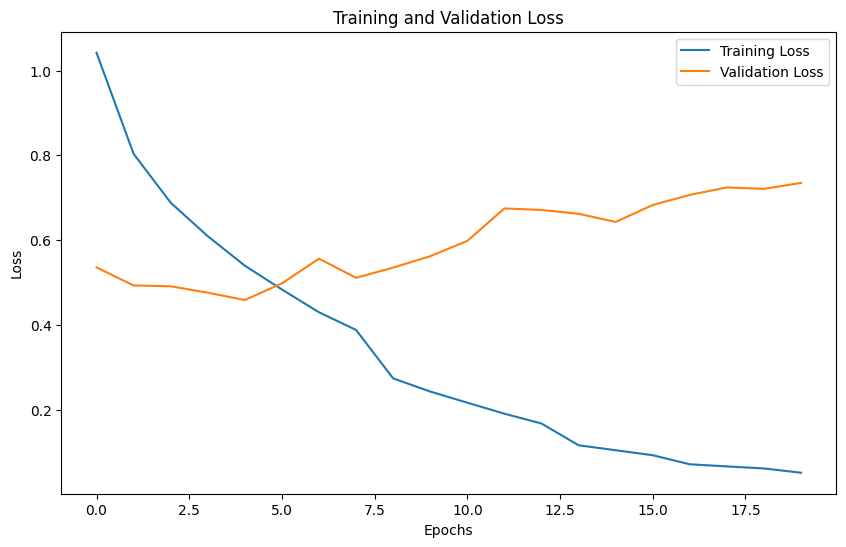

In [11]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


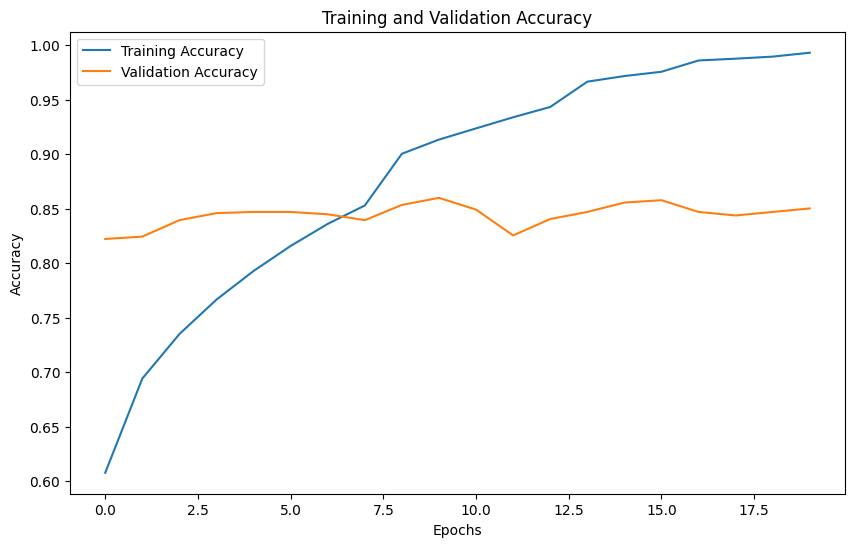

In [12]:


# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


Found 5783 images belonging to 7 classes.
181/181 [==============================] - 108s 599ms/step
              precision    recall  f1-score   support

       akiec       0.65      0.77      0.71       782
         bcc       0.76      0.69      0.72       878
         bkl       0.66      0.50      0.57       888
          df       0.86      0.89      0.88       661
         mel       0.65      0.66      0.65       888
          nv       0.82      0.91      0.86       893
        vasc       0.93      0.96      0.95       793

    accuracy                           0.76      5783
   macro avg       0.76      0.77      0.76      5783
weighted avg       0.76      0.76      0.76      5783



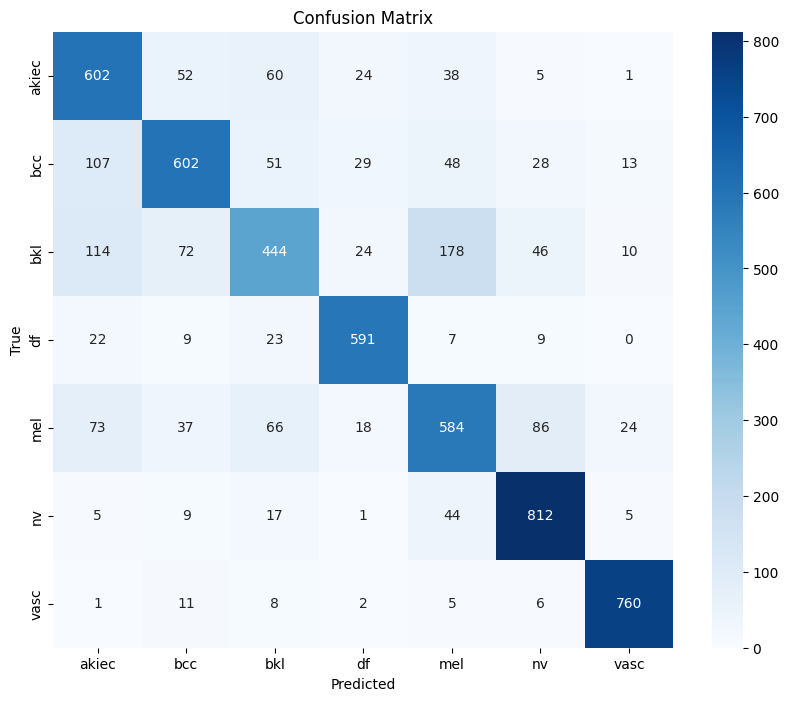

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

# Load your test dataset
test_data_dir = 'D:/Machine learning/datasets/skin cancer preproceesed dataset/base_dir/test_dir'
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep the order of images for evaluation
)

# Make predictions using the model
predictions = model_inception.predict(test_generator, steps=len(test_generator), verbose=1)

# Convert predictions and true labels to class indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Generate a classification report
class_names = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_names)
print(report)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
